# Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

#Modeling
from sklearn import linear_model

#Modeling Metrics
from sklearn import metrics

sns.set()

# Import Data and Discovery

Due to some version issues with pandas-datareader, the CSV file was downloaded separately from Yahoo Finance.

In [2]:
df = pd.read_csv('AAPL.csv',index_col='Date',parse_dates=True)

## EDA

In [3]:
df.shape

(250, 6)

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-10,220.949997,221.850006,216.470001,218.330002,214.993759,39516500
2018-09-11,218.009995,224.300003,216.559998,223.850006,220.429443,35749000
2018-09-12,224.940002,225.000000,219.839996,221.070007,217.691925,49278700
2018-09-13,223.520004,228.350006,222.570007,226.410004,222.950317,41706400
2018-09-14,225.750000,226.839996,222.520004,223.839996,220.419571,31999300


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-30,210.160004,210.449997,207.199997,208.740005,208.740005,21143400
2019-09-03,206.429993,206.979996,204.220001,205.699997,205.699997,20023000
2019-09-04,208.389999,209.479996,207.320007,209.190002,209.190002,19188100
2019-09-05,212.000000,213.970001,211.509995,213.279999,213.279999,23913700
2019-09-06,214.050003,214.419998,212.509995,213.259995,213.259995,19350800


In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,192.092360,194.140440,190.083600,192.116880,190.507695,3.258498e+07
std,21.062178,21.207069,20.938713,21.009097,20.814951,1.394851e+07
min,143.979996,145.720001,142.000000,142.190002,140.505798,1.136200e+07
25%,174.737499,175.902496,173.362499,174.757499,173.279304,2.289640e+07
50%,196.364998,198.750000,193.805000,196.345001,195.165612,2.942395e+07
75%,207.449997,209.089996,205.104996,207.479996,206.476417,3.897412e+07
max,230.779999,233.470001,229.779999,232.070007,228.523819,9.624670e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2018-09-10 to 2019-09-06
Data columns (total 6 columns):
Open         250 non-null float64
High         250 non-null float64
Low          250 non-null float64
Close        250 non-null float64
Adj Close    250 non-null float64
Volume       250 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


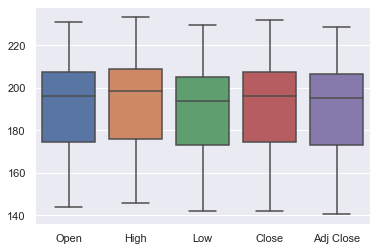

In [8]:
sns.boxplot(data = df[['Open','High','Low','Close','Adj Close']])

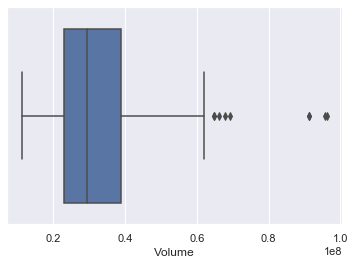

In [9]:
sns.boxplot(df['Volume'])

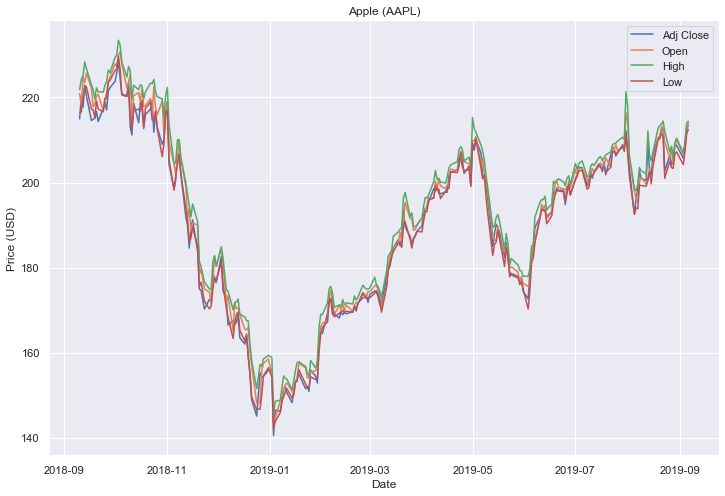

In [10]:
_ = plt.figure(figsize=(12,8))
_ = plt.plot(df['Adj Close'], label='Adj Close')
_ = plt.plot(df['Open'], label='Open')
_ = plt.plot(df['High'], label='High')
_ = plt.plot(df['Low'], label='Low')
_ = plt.legend()
_ = plt.xlabel('Date')
_ = plt.ylabel('Price (USD)')
_ = plt.title('Apple (AAPL)')
plt.show()

# Preproccessing
This model uses data from 32 records to predict the 33rd value of the 'Adj Close' feature.

In [11]:
window_size=32
num_samples=len(df)-window_size
num_samples

218

In [12]:
# Get indices of access for the data
indices=np.arange(num_samples).astype(np.int)[:,None]+np.arange(window_size+1).astype(np.int)

# indices is a matrix A, where A[0] is the indices [0:32], A[1] is [1,33], and so on...
print(indices.shape)
indices

(218, 33)


array([[  0,   1,   2, ...,  30,  31,  32],
       [  1,   2,   3, ...,  31,  32,  33],
       [  2,   3,   4, ...,  32,  33,  34],
       ...,
       [215, 216, 217, ..., 245, 246, 247],
       [216, 217, 218, ..., 246, 247, 248],
       [217, 218, 219, ..., 247, 248, 249]])

In [13]:
# use the matrix "indices" to create a matrix of Adj Close values
data = df['Adj Close'].values[indices] # Create the 2D matrix of training samples
data

array([[214.993759, 220.429443, 217.691925, ..., 217.27832 , 219.326538,
        211.803284],
       [220.429443, 217.691925, 222.950317, ..., 219.326538, 211.803284,
        216.44133 ],
       [217.691925, 222.950317, 220.419571, ..., 211.803284, 216.44133 ,
        212.994797],
       ...,
       [201.823181, 206.435654, 208.049515, ..., 208.740005, 205.699997,
        209.190002],
       [206.435654, 208.049515, 207.880173, ..., 205.699997, 209.190002,
        213.279999],
       [208.049515, 207.880173, 206.23642 , ..., 209.190002, 213.279999,
        213.259995]])

In [14]:
X = data[:,:-1] # Each row represents 32 days in the past
X

array([[214.993759, 220.429443, 217.691925, ..., 215.958801, 217.27832 ,
        219.326538],
       [220.429443, 217.691925, 222.950317, ..., 217.27832 , 219.326538,
        211.803284],
       [217.691925, 222.950317, 220.419571, ..., 219.326538, 211.803284,
        216.44133 ],
       ...,
       [201.823181, 206.435654, 208.049515, ..., 209.009995, 208.740005,
        205.699997],
       [206.435654, 208.049515, 207.880173, ..., 208.740005, 205.699997,
        209.190002],
       [208.049515, 207.880173, 206.23642 , ..., 205.699997, 209.190002,
        213.279999]])

In [15]:
y = data[:,-1] # Each output value represents the 33rd day
y

array([211.803284, 216.44133 , 212.994797, 208.996857, 210.040649,
       215.515686, 218.824341, 204.30957 , 198.509583, 200.656265,
       206.741821, 206.020493, 202.048096, 191.870087, 189.953079,
       184.587402, 189.142792, 191.237686, 183.658539, 174.883713,
       174.686081, 170.249252, 172.551666, 172.176163, 178.796799,
       177.423264, 176.464767, 182.630859, 174.597153, 172.650482,
       166.494278, 167.591125, 166.632614, 167.097046, 168.925125,
       163.519913, 161.998169, 164.102936, 158.984299, 154.972397,
       148.944626, 145.090836, 155.30835 , 154.300446, 154.379486,
       155.871613, 156.049484, 140.505798, 146.503891, 146.177811,
       148.964386, 151.494064, 151.978271, 150.48616 , 148.223282,
       151.256927, 153.104782, 154.013885, 154.962494, 151.484207,
       152.096848, 150.891296, 155.891357, 154.448654, 152.847839,
       163.292648, 164.468567, 164.547607, 169.221588, 172.116867,
       172.176163, 168.915268, 169.113724, 168.141174, 169.590

In [16]:
# Note - was not getting the results I wanted using train_test_split and TimeSeriesSplit caused an error.
# Needs additional research

train_percent = 0.8
breakpoint = int(num_samples * train_percent)

X_train = X[:breakpoint]
y_train = y[:breakpoint]
X_test = X[breakpoint:]
y_test = y[breakpoint:]

In [17]:
X_train

array([[214.993759, 220.429443, 217.691925, ..., 215.958801, 217.27832 ,
        219.326538],
       [220.429443, 217.691925, 222.950317, ..., 217.27832 , 219.326538,
        211.803284],
       [217.691925, 222.950317, 220.419571, ..., 219.326538, 211.803284,
        216.44133 ],
       ...,
       [189.360535, 188.284622, 182.396988, ..., 198.983978, 197.170853,
        200.787125],
       [188.284622, 182.396988, 185.893707, ..., 197.170853, 200.787125,
        201.962646],
       [182.396988, 185.893707, 182.088165, ..., 200.787125, 201.962646,
        203.636292]])

In [18]:
y_test.shape

(44,)

# Modeling

In [19]:
#Help Functions
def get_performance(model_pred):
  #Function returns standard performance metrics
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, model_pred).round(4))  
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, model_pred).round(4))  
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, model_pred)).round(4))
  
  
  
def get_plot(model_pred):
  plt.scatter(model_pred, y_test, color="gray")
  plt.xlabel('Predicted Values')
  plt.ylabel('Actual Values')
  plt.plot(y_test, y_test, color='red', linewidth=2)

## Linear Regression

In [20]:
model_lr = linear_model.LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred_lr=model_lr.predict(X_test)

In [22]:
get_performance(y_pred_lr)

Mean Absolute Error: 3.1314
Mean Squared Error: 15.8461
Root Mean Squared Error: 3.9807


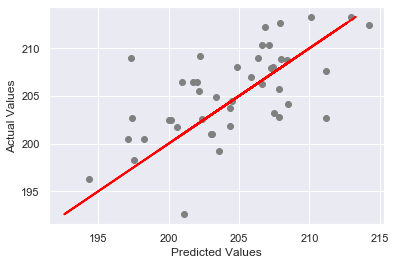

In [23]:
get_plot(y_pred_lr)

## Ridge Regression

In [25]:
model_ridge = linear_model.Ridge()
model_ridge.fit(X_train, y_train)

#generate predictions
y_pred_ridge=model_ridge.predict(X_test)

In [26]:
get_performance(y_pred_ridge)

Mean Absolute Error: 3.1307
Mean Squared Error: 15.842
Root Mean Squared Error: 3.9802


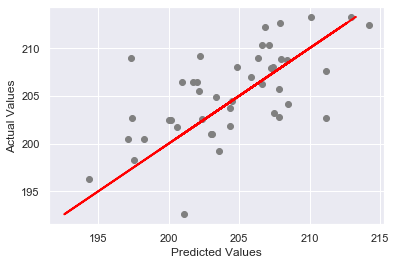

In [27]:
get_plot(y_pred_ridge)

In [28]:
model_lasso = linear_model.Lasso()
model_lasso.fit(X_train,y_train)

y_pred_lasso = model_lasso.predict(X_test)

In [29]:
get_performance(y_pred_lasso)

Mean Absolute Error: 2.9681
Mean Squared Error: 14.4847
Root Mean Squared Error: 3.8059


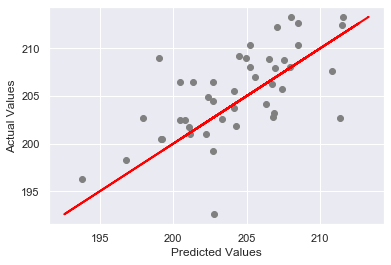

In [30]:
get_plot(y_pred_lasso)

# Conclusion and Next Steps

While all models produced similar results, Lasso had the lowest error.

This notebook only used the 'Adj Close' feature.  My next step would be to include additional features.

Finally, a shout out to Manny Bernabe.  His code and YouTube video were a big help.

